In [504]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# https://aqibsaeed.github.io/2016-07-17-anomaly-detection/

In [505]:
df = pd.read_csv("spotify.csv")

In [506]:
df.head()

,#,id,Name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,1qvY1z3Wm3sAYeHfPTnrbI,La Muralla Verde,0.724,0.856,8,-6.119,0,0.0283,0.0653,0.000002,0.354,0.884,129.794,161800,4.0
1,1,2tgUxOJHTjFxKHmfhyZGuS,Por El Resto,0.548,0.969,9,-4.631,0,0.0539,0.0410,0.000039,0.303,0.892,136.958,265627,4.0
2,2,2vR0SW93BdIciNlqeJVSch,Te V? en un Tren,0.583,0.940,2,-4.637,1,0.0346,0.1170,0.000000,0.240,0.748,136.848,245267,4.0
3,3,4BlMZN5TUA3O1NbtnMZOEh,El Extra?o Del Pelo Largo,0.500,0.951,2,-4.849,1,0.0427,0.0341,0.000000,0.416,0.676,134.741,173867,4.0
4,4,09TTeexnlKewZdjOak2sV2,Nada Personal - Remasterizado 2007,0.758,0.935,8,-5.284,0,0.0517,0.4200,0.133000,0.114,0.436,124.372,292573,4.0


In [507]:
df["key"].value_counts()

9     28
7     27
4     27
2     26
0     25
11    16
1     15
5     13
6     12
8      8
10     6
3      5
Name: key, dtype: int64

In [508]:
df = df.drop("#", axis = 1)
df = df.drop("id", axis = 1)
df = df.drop("Name", axis = 1)
df = df.drop("duration_ms", axis = 1)
df = df.drop("time_signature", axis = 1)

In [509]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.724,0.856,8,-6.119,0,0.0283,0.0653,0.000002,0.354,0.884,129.794
1,0.548,0.969,9,-4.631,0,0.0539,0.0410,0.000039,0.303,0.892,136.958
2,0.583,0.940,2,-4.637,1,0.0346,0.1170,0.000000,0.240,0.748,136.848
3,0.500,0.951,2,-4.849,1,0.0427,0.0341,0.000000,0.416,0.676,134.741
4,0.758,0.935,8,-5.284,0,0.0517,0.4200,0.133000,0.114,0.436,124.372


(array([  1.,   4.,  12.,  27.,  47.,  45.,  30.,  30.,  10.,   2.]),
 array([ 0.192 ,  0.2684,  0.3448,  0.4212,  0.4976,  0.574 ,  0.6504,
         0.7268,  0.8032,  0.8796,  0.956 ]),
 <a list of 10 Patch objects>)

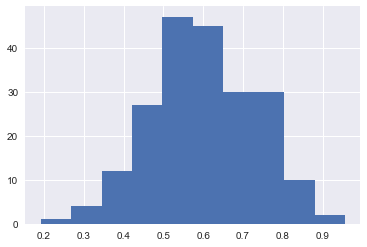

In [510]:
plt.hist(df["danceability"])

In [511]:
type(df.iloc[0]["danceability"])

numpy.float64

In [512]:
df["DanInt"] = pd.cut(df["danceability"], 10)

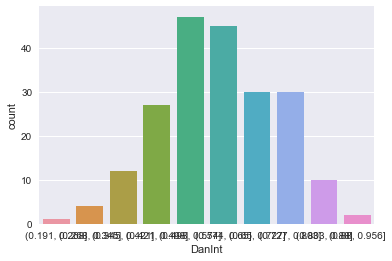

In [513]:
#df["DanInt"].value_counts()
sns.countplot(df["DanInt"])

In [514]:
def getDanIndex(x):
    if x <= 0.268:
        return 1
    if x <= 0.345:
        return 2
    if x <= 0.421:
        return 3
    if x <= 0.498:
        return 4
    if x <= 0.574:
        return 5
    if x <= 0.65:
        return 6
    if x <= 0.727:
        return 7
    if x < 0.803:
        return 8
    if x < 0.88:
        return 9
    return 10
df["DanInt"] = df["danceability"].apply(lambda x: getDanIndex(x))

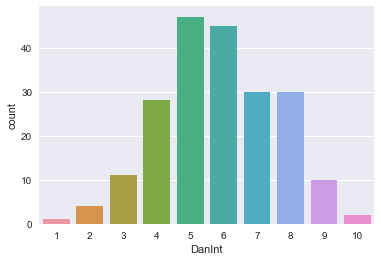

In [515]:
ax = sns.countplot(df["DanInt"])

In [516]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,DanInt
0,0.724,0.856,8,-6.119,0,0.0283,0.0653,0.000002,0.354,0.884,129.794,7
1,0.548,0.969,9,-4.631,0,0.0539,0.0410,0.000039,0.303,0.892,136.958,5
2,0.583,0.940,2,-4.637,1,0.0346,0.1170,0.000000,0.240,0.748,136.848,6
3,0.500,0.951,2,-4.849,1,0.0427,0.0341,0.000000,0.416,0.676,134.741,5
4,0.758,0.935,8,-5.284,0,0.0517,0.4200,0.133000,0.114,0.436,124.372,8


(array([  2.,   5.,   4.,   5.,   9.,  18.,  30.,  45.,  52.,  38.]),
 array([ 0.336 ,  0.4022,  0.4684,  0.5346,  0.6008,  0.667 ,  0.7332,
         0.7994,  0.8656,  0.9318,  0.998 ]),
 <a list of 10 Patch objects>)

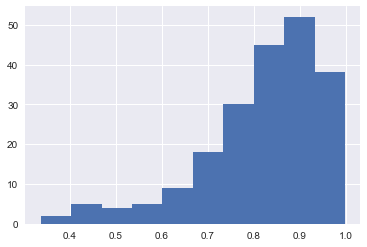

In [517]:
plt.hist(df["energy"])

In [518]:
def getEnergyIndex(x):
    for i in range(11):
        if x < 0.1 * i:
            return i
df["EneInt"] = df["energy"].apply(lambda x: getEnergyIndex(x))

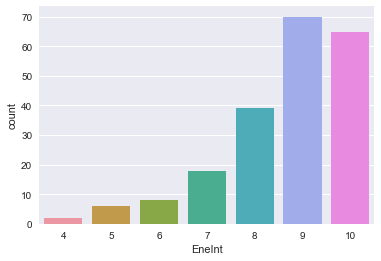

In [519]:
sns.countplot(df["EneInt"])

In [520]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,DanInt,EneInt
0,0.724,0.856,8,-6.119,0,0.0283,0.0653,0.000002,0.354,0.884,129.794,7,9
1,0.548,0.969,9,-4.631,0,0.0539,0.0410,0.000039,0.303,0.892,136.958,5,10
2,0.583,0.940,2,-4.637,1,0.0346,0.1170,0.000000,0.240,0.748,136.848,6,10
3,0.500,0.951,2,-4.849,1,0.0427,0.0341,0.000000,0.416,0.676,134.741,5,10
4,0.758,0.935,8,-5.284,0,0.0517,0.4200,0.133000,0.114,0.436,124.372,8,10


In [521]:
df["key"].value_counts()

9     28
7     27
4     27
2     26
0     25
11    16
1     15
5     13
6     12
8      8
10     6
3      5
Name: key, dtype: int64

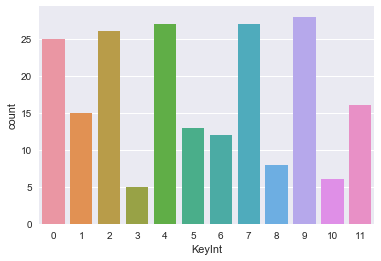

In [522]:
df["KeyInt"] = df["key"]
df["ModInt"] = df["mode"]
sns.countplot(df["KeyInt"])

In [523]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,DanInt,EneInt,KeyInt,ModInt
0,0.724,0.856,8,-6.119,0,0.0283,0.0653,0.000002,0.354,0.884,129.794,7,9,8,0
1,0.548,0.969,9,-4.631,0,0.0539,0.0410,0.000039,0.303,0.892,136.958,5,10,9,0
2,0.583,0.940,2,-4.637,1,0.0346,0.1170,0.000000,0.240,0.748,136.848,6,10,2,1
3,0.500,0.951,2,-4.849,1,0.0427,0.0341,0.000000,0.416,0.676,134.741,5,10,2,1
4,0.758,0.935,8,-5.284,0,0.0517,0.4200,0.133000,0.114,0.436,124.372,8,10,8,0


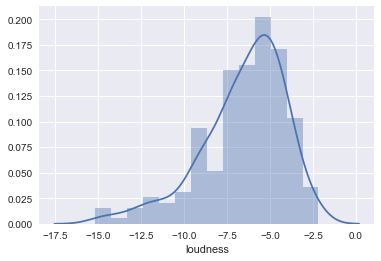

In [524]:
sns.distplot(df["loudness"])

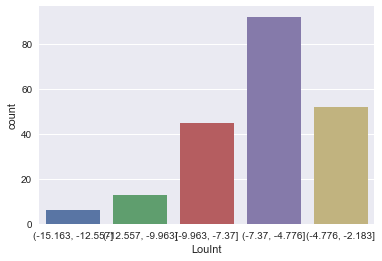

In [525]:
df["LouInt"] = pd.cut(df["loudness"], 5)
sns.countplot(df["LouInt"])

In [526]:
df["LouInt"].value_counts()

(-7.37, -4.776]       92
(-4.776, -2.183]      52
(-9.963, -7.37]       45
(-12.557, -9.963]     13
(-15.163, -12.557]     6
Name: LouInt, dtype: int64

In [527]:
def getLoudnessIndex(x):
    for i in range (1, 60):
        if x > -5 * i:
            return i

df["LouInt"] = df["loudness"].apply(lambda x: getLoudnessIndex(x))

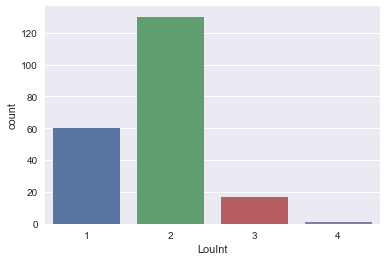

In [528]:
sns.countplot(df["LouInt"])

In [529]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,DanInt,EneInt,KeyInt,ModInt,LouInt
0,0.724,0.856,8,-6.119,0,0.0283,0.0653,0.000002,0.354,0.884,129.794,7,9,8,0,2
1,0.548,0.969,9,-4.631,0,0.0539,0.0410,0.000039,0.303,0.892,136.958,5,10,9,0,1
2,0.583,0.940,2,-4.637,1,0.0346,0.1170,0.000000,0.240,0.748,136.848,6,10,2,1,1
3,0.500,0.951,2,-4.849,1,0.0427,0.0341,0.000000,0.416,0.676,134.741,5,10,2,1,1
4,0.758,0.935,8,-5.284,0,0.0517,0.4200,0.133000,0.114,0.436,124.372,8,10,8,0,2


(array([ 134.,   45.,   18.,    6.,    1.,    2.,    1.,    0.,    0.,    1.]),
 array([ 0.0243 ,  0.05227,  0.08024,  0.10821,  0.13618,  0.16415,
         0.19212,  0.22009,  0.24806,  0.27603,  0.304  ]),
 <a list of 10 Patch objects>)

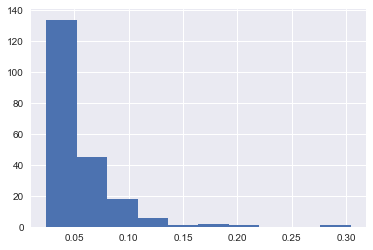

In [530]:
plt.hist(df["speechiness"])

In [531]:
def getSpeechinessIndex(x):
    for i in range(11):
        if x < 0.10 * i:
            return i
df["SpeInt"] = df["speechiness"].apply(lambda x: getSpeechinessIndex(x))

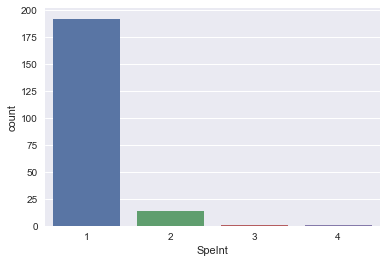

In [532]:
sns.countplot(df["SpeInt"])

(array([ 135.,   29.,   16.,   11.,    6.,    4.,    3.,    1.,    1.,    2.]),
 array([  3.27000000e-05,   7.78294300e-02,   1.55626160e-01,
          2.33422890e-01,   3.11219620e-01,   3.89016350e-01,
          4.66813080e-01,   5.44609810e-01,   6.22406540e-01,
          7.00203270e-01,   7.78000000e-01]),
 <a list of 10 Patch objects>)

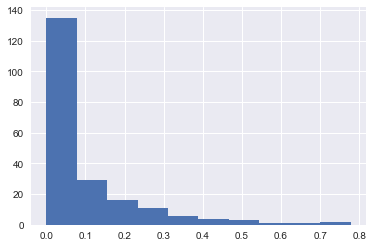

In [533]:
plt.hist(df["acousticness"])

In [534]:
def getAcousticnessIndex(x):
    for i in range(11):
        if x < 0.1 * i:
            return i

df["AcoInt"] = df["acousticness"].apply(lambda x: getAcousticnessIndex(x))

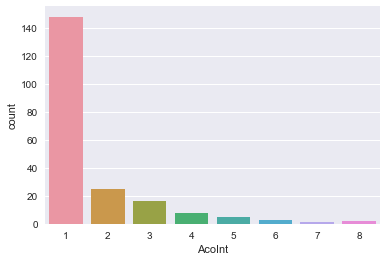

In [535]:
sns.countplot(df["AcoInt"])

In [536]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,DanInt,EneInt,KeyInt,ModInt,LouInt,SpeInt,AcoInt
0,0.724,0.856,8,-6.119,0,0.0283,0.0653,0.000002,0.354,0.884,129.794,7,9,8,0,2,1,1
1,0.548,0.969,9,-4.631,0,0.0539,0.0410,0.000039,0.303,0.892,136.958,5,10,9,0,1,1,1
2,0.583,0.940,2,-4.637,1,0.0346,0.1170,0.000000,0.240,0.748,136.848,6,10,2,1,1,1,2
3,0.500,0.951,2,-4.849,1,0.0427,0.0341,0.000000,0.416,0.676,134.741,5,10,2,1,1,1,1
4,0.758,0.935,8,-5.284,0,0.0517,0.4200,0.133000,0.114,0.436,124.372,8,10,8,0,2,1,5


In [537]:
def getInstrumentalnessIndex(x):
    for i in range(11):
        if x < 0.1 * i:
            return i
df["InsInt"] = df["instrumentalness"].apply(lambda x: getInstrumentalnessIndex(x))

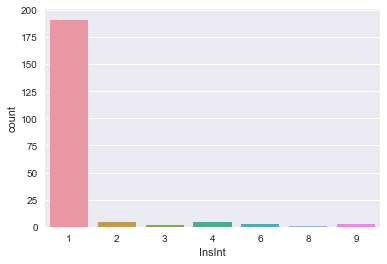

In [538]:
sns.countplot(df["InsInt"])

In [539]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,DanInt,EneInt,KeyInt,ModInt,LouInt,SpeInt,AcoInt,InsInt
0,0.724,0.856,8,-6.119,0,0.0283,0.0653,0.000002,0.354,0.884,129.794,7,9,8,0,2,1,1,1
1,0.548,0.969,9,-4.631,0,0.0539,0.0410,0.000039,0.303,0.892,136.958,5,10,9,0,1,1,1,1
2,0.583,0.940,2,-4.637,1,0.0346,0.1170,0.000000,0.240,0.748,136.848,6,10,2,1,1,1,2,1
3,0.500,0.951,2,-4.849,1,0.0427,0.0341,0.000000,0.416,0.676,134.741,5,10,2,1,1,1,1,1
4,0.758,0.935,8,-5.284,0,0.0517,0.4200,0.133000,0.114,0.436,124.372,8,10,8,0,2,1,5,2


(array([ 97.,  45.,  30.,  22.,   1.,   4.,   5.,   0.,   0.,   4.]),
 array([ 0.029 ,  0.1241,  0.2192,  0.3143,  0.4094,  0.5045,  0.5996,
         0.6947,  0.7898,  0.8849,  0.98  ]),
 <a list of 10 Patch objects>)

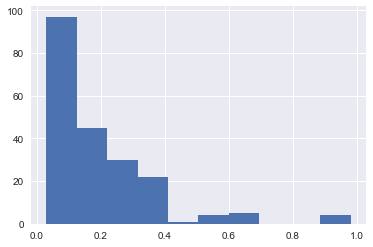

In [540]:
plt.hist(df["liveness"])

In [541]:
def getLivenessIndex(x):
    for i in range(11):
        if x < 0.1 * i:
            return i
df["LivInt"] = df["liveness"].apply(lambda x: getLivenessIndex(x))

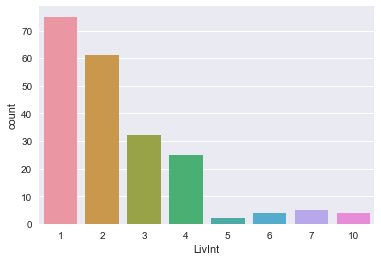

In [542]:
sns.countplot(df["LivInt"])

In [543]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,DanInt,EneInt,KeyInt,ModInt,LouInt,SpeInt,AcoInt,InsInt,LivInt
0,0.724,0.856,8,-6.119,0,0.0283,0.0653,0.000002,0.354,0.884,129.794,7,9,8,0,2,1,1,1,4
1,0.548,0.969,9,-4.631,0,0.0539,0.0410,0.000039,0.303,0.892,136.958,5,10,9,0,1,1,1,1,4
2,0.583,0.940,2,-4.637,1,0.0346,0.1170,0.000000,0.240,0.748,136.848,6,10,2,1,1,1,2,1,3
3,0.500,0.951,2,-4.849,1,0.0427,0.0341,0.000000,0.416,0.676,134.741,5,10,2,1,1,1,1,1,5
4,0.758,0.935,8,-5.284,0,0.0517,0.4200,0.133000,0.114,0.436,124.372,8,10,8,0,2,1,5,2,2


(array([  5.,   8.,   9.,  14.,  20.,  22.,  24.,  33.,  33.,  40.]),
 array([ 0.166 ,  0.2466,  0.3272,  0.4078,  0.4884,  0.569 ,  0.6496,
         0.7302,  0.8108,  0.8914,  0.972 ]),
 <a list of 10 Patch objects>)

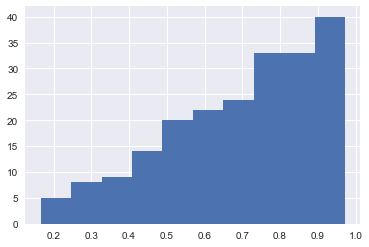

In [544]:
plt.hist(df["valence"])

In [545]:
def getValencenessIndex(x):
    for i in range(11):
        if x < 0.1 * i:
            return i
df["ValInt"] = df["valence"].apply(lambda x: getValencenessIndex(x))

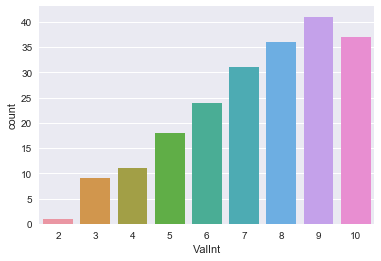

In [546]:
sns.countplot(df["ValInt"])

In [547]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,DanInt,EneInt,KeyInt,ModInt,LouInt,SpeInt,AcoInt,InsInt,LivInt,ValInt
0,0.724,0.856,8,-6.119,0,0.0283,0.0653,0.000002,0.354,0.884,...,7,9,8,0,2,1,1,1,4,9
1,0.548,0.969,9,-4.631,0,0.0539,0.0410,0.000039,0.303,0.892,...,5,10,9,0,1,1,1,1,4,9
2,0.583,0.940,2,-4.637,1,0.0346,0.1170,0.000000,0.240,0.748,...,6,10,2,1,1,1,2,1,3,8
3,0.500,0.951,2,-4.849,1,0.0427,0.0341,0.000000,0.416,0.676,...,5,10,2,1,1,1,1,1,5,7
4,0.758,0.935,8,-5.284,0,0.0517,0.4200,0.133000,0.114,0.436,...,8,10,8,0,2,1,5,2,2,5


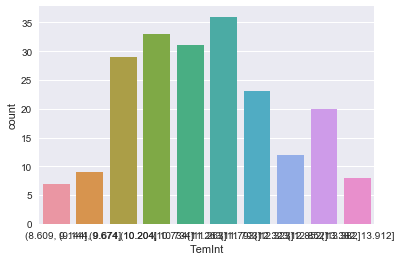

In [548]:
df["TemInt"] = df["tempo"].apply(lambda x: x**0.5)
df["TemInt"] = pd.cut(df["TemInt"], 10)
#plt.hist(df["TemInt"])
sns.countplot(df["TemInt"])

In [549]:
df["TemInt"].value_counts()

(11.263, 11.793]    36
(10.204, 10.734]    33
(10.734, 11.263]    31
(9.674, 10.204]     29
(11.793, 12.323]    23
(12.852, 13.382]    20
(12.323, 12.852]    12
(9.144, 9.674]       9
(13.382, 13.912]     8
(8.609, 9.144]       7
Name: TemInt, dtype: int64

In [550]:
def getTempoIndex(x):
    x = x**0.5
    if x <= 9.144:
        return 1
    if x <= 9.674:
        return 2
    if x <= 10.204:
        return 3
    if x <= 10.734:
        return 4
    if x <= 11.263:
        return 5
    if x <= 11.793:
        return 6
    if x <= 12.323:
        return 7
    if x <= 12.852:
        return 8
    if x <= 13.382:
        return 9
    return 10
df["TemInt"] = df["tempo"].apply(lambda x: getTempoIndex(x))

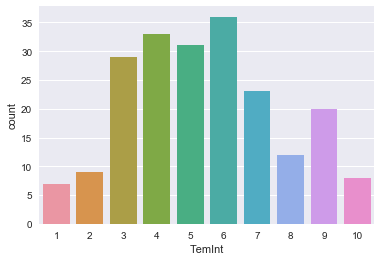

In [551]:
sns.countplot(df["TemInt"])

In [552]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,EneInt,KeyInt,ModInt,LouInt,SpeInt,AcoInt,InsInt,LivInt,ValInt,TemInt
0,0.724,0.856,8,-6.119,0,0.0283,0.0653,0.000002,0.354,0.884,...,9,8,0,2,1,1,1,4,9,6
1,0.548,0.969,9,-4.631,0,0.0539,0.0410,0.000039,0.303,0.892,...,10,9,0,1,1,1,1,4,9,6
2,0.583,0.940,2,-4.637,1,0.0346,0.1170,0.000000,0.240,0.748,...,10,2,1,1,1,2,1,3,8,6
3,0.500,0.951,2,-4.849,1,0.0427,0.0341,0.000000,0.416,0.676,...,10,2,1,1,1,1,1,5,7,6
4,0.758,0.935,8,-5.284,0,0.0517,0.4200,0.133000,0.114,0.436,...,10,8,0,2,1,5,2,2,5,5


In [553]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'DanInt', 'EneInt', 'KeyInt', 'ModInt', 'LouInt', 'SpeInt', 'AcoInt',
       'InsInt', 'LivInt', 'ValInt', 'TemInt'],
      dtype='object')

In [554]:
df = df.drop(["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "key", "mode"], axis = 1)

In [642]:
df.head()

,DanInt,EneInt,KeyInt,ModInt,LouInt,SpeInt,AcoInt,InsInt,LivInt,ValInt,TemInt
0,7,9,8,0,2,1,1,1,4,9,6
1,5,10,9,0,1,1,1,1,4,9,6
2,6,10,2,1,1,1,2,1,3,8,6
3,5,10,2,1,1,1,1,1,5,7,6
4,8,10,8,0,2,1,5,2,2,5,5


In [662]:
df = df.drop(["ModInt", "KeyInt", "LouInt"], axis = 1)
#sns.countplot(df["TemInt"])

In [663]:
#sns.pairplot(df)
df.describe()

,DanInt,EneInt,SpeInt,AcoInt,InsInt,LivInt,ValInt,TemInt
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,5.860577,8.673077,1.091346,1.653846,1.317308,2.413462,7.456731,5.442308
std,1.723602,1.340144,0.349357,1.320732,1.287355,1.750697,2.030695,2.260037
min,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,5.000000,8.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000
50%,6.000000,9.000000,1.000000,1.000000,1.000000,2.000000,8.000000,5.000000
75%,7.000000,10.000000,1.000000,2.000000,1.000000,3.000000,9.000000,7.000000
max,10.000000,10.000000,4.000000,8.000000,9.000000,10.000000,10.000000,10.000000


In [664]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [665]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [666]:
x_pca = pca.transform(scaled_data)
#scaled_data.shape
#x_pca.shape

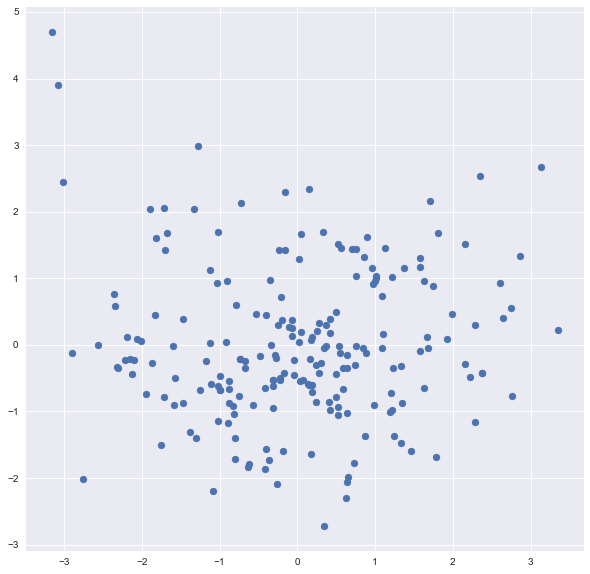

In [667]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1])

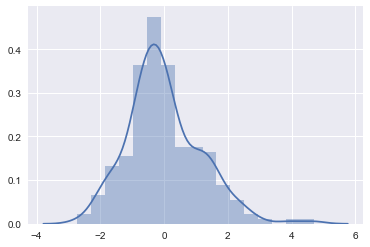

In [668]:
sns.distplot(x_pca[:,1])

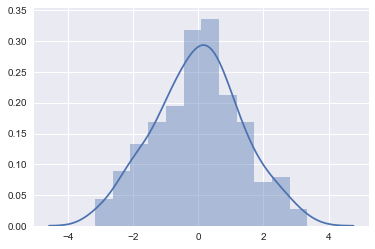

In [717]:
sns.distplot(x_pca[:,0])

In [708]:
ndf = pd.DataFrame(x_pca, columns =["p1", "p2"])

In [709]:
ndf = ndf.drop("p2", axis = 1)

In [710]:
ndf.head()

,p1
0,0.141335
1,1.201734
2,0.496219
3,1.664258
4,-1.038655


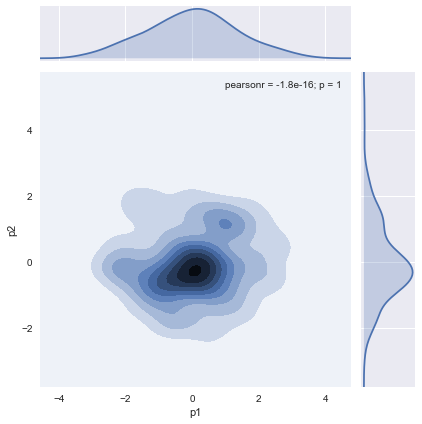

In [672]:
sns.jointplot(x= "p1", y= "p2", data=ndf, kind="kde");

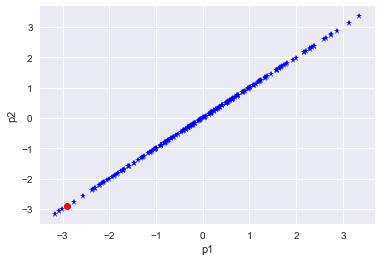

In [715]:
plt.figure() 
plt.xlabel("p1") 
plt.ylabel("p2") 
plt.plot(x_pca[:,0],x_pca[:,0], "b*")
plt.plot(x_pca[201,0],x_pca[201,0],"ro")
plt.show()

In [696]:
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

In [697]:
from scipy.stats import multivariate_normal
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [698]:
def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(gt, predictions, average = "binary")
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    return best_f1, best_epsilon

In [711]:
mu, sigma = estimateGaussian(ndf)
p = multivariateGaussian(ndf,mu,sigma)

In [735]:
#outliers = np.asarray(np.where(p < 0.0096))
#outliers = np.asarray(np.where(p < 0.05))
outliers = np.asarray(np.where(p < 0.028))

In [736]:
outliers

array([[ 42, 125, 190, 193, 200, 201]], dtype=int64)

In [737]:
orig = pd.read_csv("spotify.csv")
#orig.columns
for out in outliers:
    print(orig.iloc[out]["Name"])

42     Tele-Ka - Me Ver?s Volver Gira 2007
125     We Will Rock You - Remastered 2011
190          No Me Arrepiento de Este Amor
193                              Mil Horas
200                                  Cielo
201       Conteo Regresivo - Salsa Version
Name: Name, dtype: object


In [738]:
tmp = orig["Name"].apply(lambda x: "Regresivo" in x)
tmp.value_counts()

False    207
True       1
Name: Name, dtype: int64

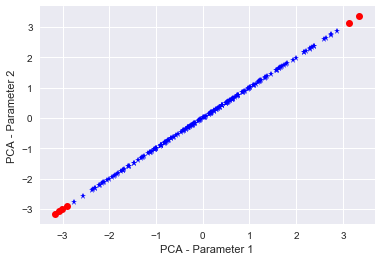

In [739]:
plt.figure() 
plt.xlabel("PCA - Parameter 1") 
plt.ylabel("PCA - Parameter 2") 
plt.plot(x_pca[:,0],x_pca[:,0],"b*")
plt.plot(x_pca[outliers,0],x_pca[outliers,0],"ro")
#plt.show()
plt.savefig('anomaly.png') 

In [490]:
plt.savefig('anomaly.png') 

In [740]:
p.max()

0.29940289638639511

In [741]:
p.min()

0.012678373842907514

In [746]:
p[201]

0.027900322348610382

In [743]:
orig.iloc[p.argmax()]["Name"]

"I'll Do You"

In [744]:
orig.iloc[p.argmin()]["Name"]

'Tele-Ka - Me Ver?s Volver Gira 2007'